In [ ]:
# Introduction

- Neural Networks (NNs) form the backbone of modern AI through Deep Learning.
- They are a network of interconnected nodes that can learn from data, make predictions, and uncover complex patterns in the most diverse datasets inspired by the human brain.

![Insert Image of Neural Network](images/ICLH_Diagram_Batch_01_03-DeepNeuralNetwork.png)

- Use cases for these networks and algorithms include; Image Classification (CNNs), Text Classification (BERT, RNNs), Image Segmentation (CNNs), Text Generation (GPTs), Image Generation (GANs)


Links;

1. Text Classification. https://www.analyticsvidhya.com/blog/2020/12/understanding-text-classification-in-nlp-with-movie-review-example-example/
2. Image Segmentation. https://www.analyticsvidhya.com/blog/2019/04/introduction-image-segmentation-techniques-python/
3. Text Generation. https://openai.com/blog/chatgpt
4. Image Generation. https://openai.com/dall-e-2 

In [ ]:
# Components

- NNs are comprised of node layers (an input layer, one or more hidden layers, and an output layer).
- Each node has an associated weight and bias/threshold. If the output of any individual node is above the specified threshold value, that node is activated, sending data to the next layer of the network. Otherwise, no data is passed along to the next layer of the network.
- Weights determine the importance of its input value, the larger the assigned weight, the more important the value is.

![Insert Image of Perceptron](images/0_LJBO8UbtzK_SKMog.png)

Think of it as the linear equation; $y = Wx + b$.


In [ ]:
# Important Fuctions

- Some key functions used to help NNs include; Activation Functions, Cost Functions and Optimization Functions
- Activation functions help NNs learn non-Linear decision boundaries, i.e the complex in complex data. Some such as Sigmoid and Softmax can be used in output layers to determine the kind of task you're doing, binary classification or multi-class classification resp.
![Tanh Example](images/Screenshot%202023-10-20%20at%2011.10.25.png)
  
- Cost functions help in error/loss calculation, e.g MSE.
- Optimization functions are responsible for the method by which your model weights or parameters will be updated, e.g SGD uses the negative gradient of the loss with respect to the data points. Basically how your model learns.

![Gradient Descent](images/ICLH_Diagram_Batch_01_04-GradientDescent.png)


Links;
1. Activation Functions. https://github.com/DSC-Laikipia-University/MNIST-Classifier/blob/master/activation_functions.ipynb, https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity, https://pytorch.org/docs/stable/nn.html#non-linear-activations-other
2. SGD. https://realpython.com/gradient-descent-algorithm-python/
3. Cost Functions. https://pytorch.org/docs/stable/nn.html#loss-functions

In [ ]:
# How do they work internally? Mathematics

Starter function.
$$
y = \sum W_ix_i + b
$$


Expand it.
$$
y=W_1⋅x_1 + W_2⋅x_2 + W_3⋅x_3 + b
$$

Our Activation Function.
$$
output = f(x) = 1 \text{ if} \sum W_ix_i + b>= 0 \text{ ; } 0 \text{ if} \sum W_ix_i + b < 0
$$

![Insert Image of Perceptron](images/0_LJBO8UbtzK_SKMog.png)

Example: The above function represents a NN that is meant to determine whether you'll attend (y) an event, i.e. a binary decision of Yes. 1 and No. 0. This decision is influenced by the following three variables (1 - True, 0 - False in this case);
1. Will there be swag (Stickers and such)? (Yes: 0, No: 1)
2. Is the event within Nairobi? (Yes: 1, No: 0)
3. Is the event about Machine Learning? (Yes: 1, No: 0)

Let's assign our model input variables values based on the influences.
$$
x_1 = 0, \text{since no swag}
$$

$$
x_2 = 1, \text{since event is within the City}
$$

$$
x_3 = 1, \text{since even is ML based}
$$

What about the weights? Weight initialization is normally random, so let's randomize.
Note; you'll normally not need to do this in real life.

In [44]:
# dummy weight initialization
import random

def d_w_i():
    W_1 = random.randint(0, 10)
    W_2 = random.randint(0, 10)
    W_3 = random.randint(0, 10)

    return W_1, W_2, W_3
    
W_1, W_2, W_3 = d_w_i()
W_1, W_2, W_3

(0, 0, 8)

$$
W_1 = 7,
W_2 = 8,
W_3 = 9,
$$

Let's set a bias value of -4.

In [45]:
# Our complete function is now.
y = W_1*0 + W_2*1 + W_3*1 - 4
y

4

Since y > 0, according to our activation function, our prediction is YES/1, therefore, we'll attend the event.

In this scenario will not include loss calculation but it's something that you can explore.

In [1]:
# Mathematics fucntions -> Image Representation -> Python Code (Handwritten Digits)

Let's now adapt this function to train a model with 2 hidden layers that can classify (28*28, grayscale) MNIST handwritten digits. We only included the sigmoid function symbol.

$$
y = \sum \sigma(W_ix_i + b_i)
$$

$$
y=σ(W_3⋅σ(W_2⋅σ(W_1⋅x+b_1)+b_2)+b_3)
$$

![Image of Network](images/Screenshot_20231020_192547_Drive.jpg)


Data Shapes
$$
x = 28 * 28 = 784
$$
$$
W_1 = (784, 128), b_1 = 128 
$$
$$
W_2 = (128, 64), b_2 = 64
$$
$$
W_3 = (64, 10), b_3 = 10
$$

Note:
- We'll be using PyTorch.
- Bias and Weights will automatically calculated. 

In [46]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np


# hyperparameters
batch_size = 64
lr = .01
dropout = .5
momentum = .9
epochs = 3

# Define transforms
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Create training set and define training dataloader
trainset = torchvision.datasets.MNIST(root="data", train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, shuffle=True, batch_size=batch_size)

# Create test set and define test dataloader
testset = torchvision.datasets.MNIST(root="data", train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size)

6


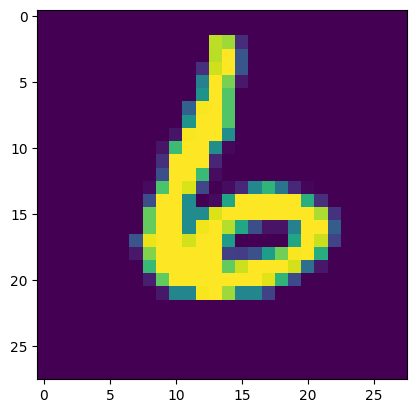

0


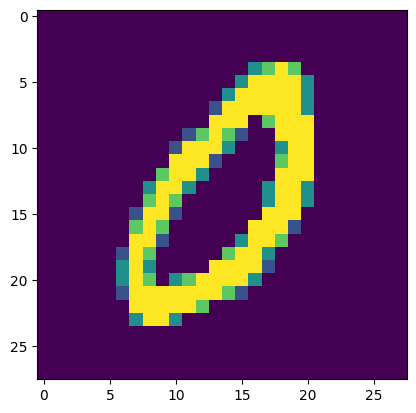

9


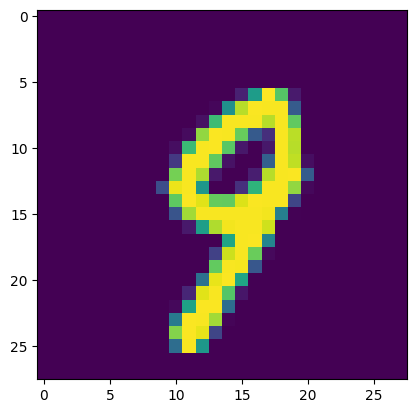

1


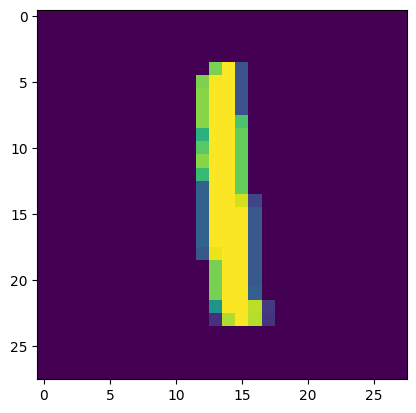

7


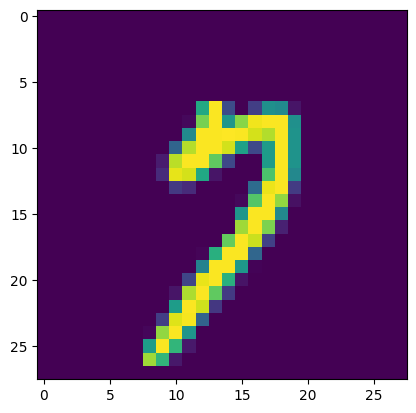

In [47]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

# Explore data
show5(trainloader)

In [48]:
# Model from Mathematical Function
model = nn.Sequential(
    nn.Flatten(), # flatten since linear layers can only access vectors
    nn.Linear(28 * 28, 128), # Input layer, Hidden layer 1
    nn.ReLU(),
    nn.Linear(128, 64), # Hidden layer 1 , Hidden layer 2
    nn.ReLU(),
    nn.Linear(64, 10) # Hidden layer 2,  Output layer
)

# Cost and Optimization Functions
criterion = nn.CrossEntropyLoss() # Used instead of CrossEntropy since I used log softmax as the final layer activation funciton.
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)

In [30]:
# Training

- Training involves three major concepts; Forward Propagation, Error Calculation, and Back Propagation.
- Forwards propagation is what we described with our first function i.e. moving the input data through the network.
- Error/Loss calculation, similar to basic ML, is determining how good your model is compared to your ground truth. Difference between your y_pred and y_test.
- Back Propagation. This can be considered a crucial step as it determines how your model learns through the optimization function, i.e. updates the weights accordingly towards minimizing the loss during training. (A bunch of dy/dx calculations!)

Resources of Back Propagation;
1. https://en.wikipedia.org/wiki/Backpropagation
2. https://brilliant.org/wiki/backpropagation/

In [33]:
# Training Loop
for epoch in range(epochs):
    for inputs, labels in trainloader:
        optimizer.zero_grad() # clear optimizer
        outputs = model(inputs) # forward pass
        loss = criterion(outputs, labels) # loss calculation
        loss.backward() # backward pass
        optimizer.step() # model parameter / weight update
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [1/3], Loss: 0.1182
Epoch [2/3], Loss: 0.1564
Epoch [3/3], Loss: 0.2067


In [34]:
# Testing / Evaluation
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in testloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy on the test dataset: {accuracy:.2f}%')

Accuracy on the test dataset: 96.48%


In [37]:
# Peek into the predicted values
print(predicted)

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6])


In [39]:
# More Resources

1. PyTorch Course NYU. https://github.com/Atcold/NYU-DLSP20
2. Visualize your NNs. https://alexlenail.me/NN-SVG/

In [ ]:
# Q&A